# 6.1 The Sample Mean

The fundamental problem of statistical inference is: **How can we learn about a population by examining a sample?**

## Populations and Samples

### Definitions

**Population**: The entire collection of items we want to study.
- Examples: All voters in a country, all manufactured chips, all possible coin flips

**Sample**: A subset of the population that we actually observe.
- Examples: 1000 surveyed voters, 100 tested chips, 50 coin flips

**Parameter**: A numerical characteristic of the population (usually unknown).
- Examples: Population mean μ, population variance σ²

**Statistic**: A numerical characteristic computed from a sample.
- Examples: Sample mean x̄, sample variance s²

### The Urn Model

A useful mental model for sampling:

```
┌─────────────────────────────┐
│   Population (Urn)          │
│   N items with values       │
│   μ = population mean       │
│   σ² = population variance  │
└─────────────────────────────┘
         ↓ (draw n items)
┌─────────────────────────────┐
│   Sample                    │
│   n items: x₁, x₂, ..., xₙ  │
│   x̄ = sample mean           │
│   s² = sample variance      │
└─────────────────────────────┘
```

## The Sample Mean as an Estimator

### Definition

Given a sample $(x_1, x_2, \ldots, x_n)$, the **sample mean** is:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

### Key Property: Unbiasedness

**Theorem**: If $(X_1, X_2, \ldots, X_n)$ are independent random variables drawn from a distribution with mean μ, then:

$$
E[\bar{X}] = \mu
$$

**Proof**:
$$
\begin{align}
E[\bar{X}] &= E\left[\frac{1}{n}\sum_{i=1}^{n} X_i\right] \\
&= \frac{1}{n}\sum_{i=1}^{n} E[X_i] \\
&= \frac{1}{n}\sum_{i=1}^{n} \mu \\
&= \frac{1}{n} \cdot n\mu \\
&= \mu
\end{align}
$$

This means the sample mean is an **unbiased estimator** of the population mean.

## Variance of the Sample Mean

### The Key Result

**Theorem**: If $(X_1, X_2, \ldots, X_n)$ are **independent** random variables from a distribution with variance σ², then:

$$
\text{Var}(\bar{X}) = \frac{\sigma^2}{n}
$$

**Proof**:
$$
\begin{align}
\text{Var}(\bar{X}) &= \text{Var}\left(\frac{1}{n}\sum_{i=1}^{n} X_i\right) \\
&= \frac{1}{n^2}\text{Var}\left(\sum_{i=1}^{n} X_i\right) \\
&= \frac{1}{n^2}\sum_{i=1}^{n} \text{Var}(X_i) \quad \text{(by independence)} \\
&= \frac{1}{n^2}\sum_{i=1}^{n} \sigma^2 \\
&= \frac{1}{n^2} \cdot n\sigma^2 \\
&= \frac{\sigma^2}{n}
\end{align}
$$

### Standard Error

The **standard error** of the sample mean is:

$$
\text{SE}(\bar{X}) = \sqrt{\text{Var}(\bar{X})} = \frac{\sigma}{\sqrt{n}}
$$

**Key Insight**: The standard error decreases as \(\sqrt{n}\). To halve the standard error, you need 4 times as many samples!

## Python Example: Sampling Distribution

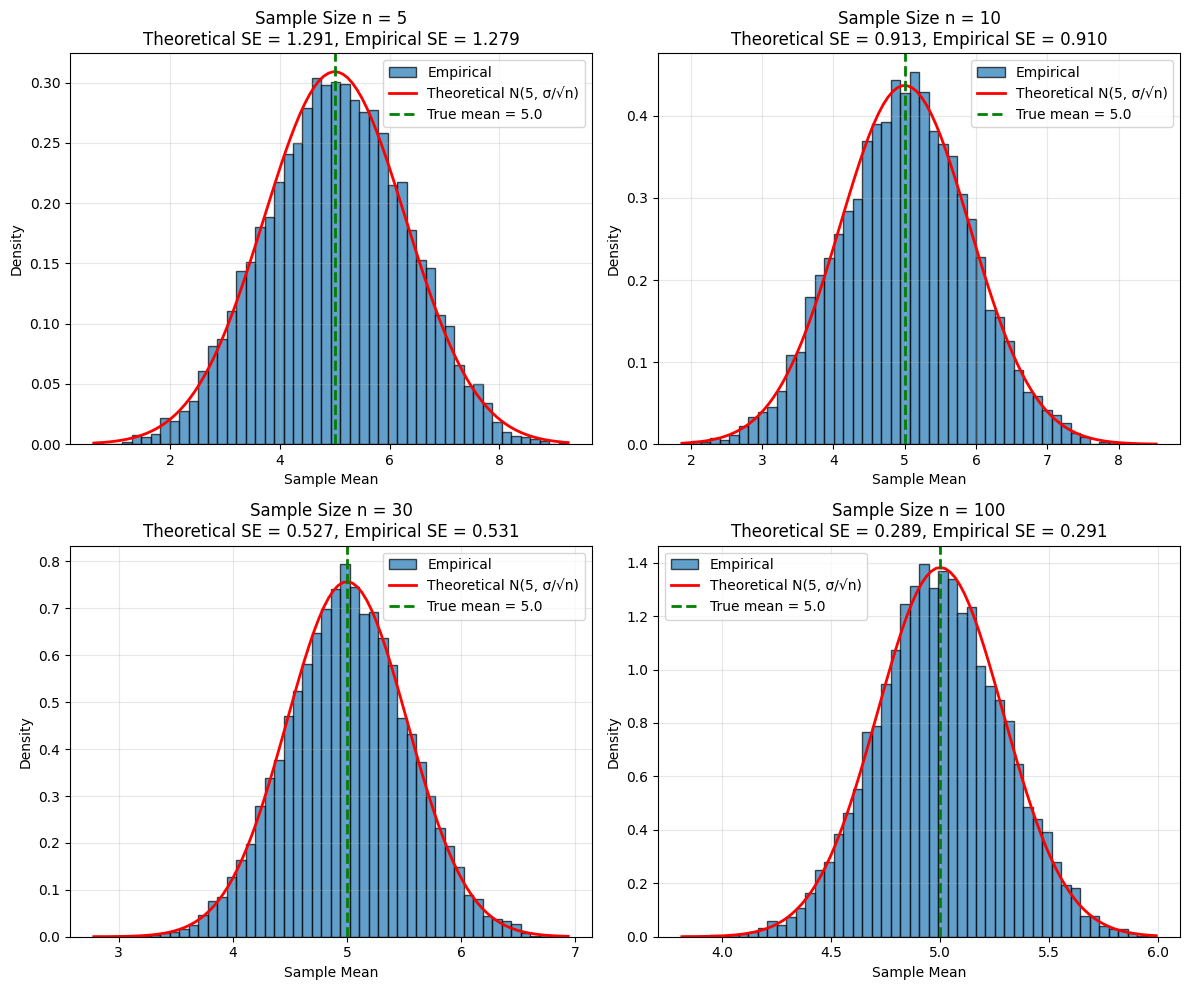

Sample Size | Theoretical SE | Empirical SE | Ratio
------------------------------------------------------------
          5 |         1.2910 |       1.2901 | 0.999
         10 |         0.9129 |       0.9205 | 1.008
         30 |         0.5270 |       0.5293 | 1.004
        100 |         0.2887 |       0.2885 | 0.999


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Population: uniform distribution on [0, 10]
population_mean = 5.0
population_std = np.sqrt(100/12)  # Var = (10-0)²/12

# Function to draw samples and compute sample mean
def sample_mean(n_samples, sample_size):
    """Draw n_samples, each of size sample_size, compute their means"""
    means = []
    for _ in range(n_samples):
        sample = np.random.uniform(0, 10, sample_size)
        means.append(np.mean(sample))
    return np.array(means)

# Different sample sizes
sample_sizes = [5, 10, 30, 100]
n_samples = 10000

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, n in enumerate(sample_sizes):
    # Generate sample means
    sample_means = sample_mean(n_samples, n)
    
    # Theoretical standard error
    theoretical_se = population_std / np.sqrt(n)
    
    # Empirical standard error
    empirical_se = np.std(sample_means, ddof=1)
    
    # Plot histogram
    axes[idx].hist(sample_means, bins=50, density=True, 
                   alpha=0.7, edgecolor='black', label='Empirical')
    
    # Overlay theoretical normal distribution
    x = np.linspace(sample_means.min(), sample_means.max(), 100)
    axes[idx].plot(x, stats.norm.pdf(x, population_mean, theoretical_se),
                   'r-', linewidth=2, label='Theoretical N(5, σ/√n)')
    
    axes[idx].axvline(population_mean, color='green', linestyle='--', 
                     linewidth=2, label=f'True mean = {population_mean}')
    axes[idx].set_xlabel('Sample Mean')
    axes[idx].set_ylabel('Density')
    axes[idx].set_title(f'Sample Size n = {n}\nTheoretical SE = {theoretical_se:.3f}, Empirical SE = {empirical_se:.3f}')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('sampling_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("Sample Size | Theoretical SE | Empirical SE | Ratio")
print("-" * 60)
for n in sample_sizes:
    means = sample_mean(n_samples, n)
    theo_se = population_std / np.sqrt(n)
    emp_se = np.std(means, ddof=1)
    print(f"{n:11d} | {theo_se:14.4f} | {emp_se:12.4f} | {emp_se/theo_se:5.3f}")

**Observations**:
1. As n increases, the distribution of sample means becomes narrower (smaller SE)
2. The empirical SE matches the theoretical SE = σ/√n very closely
3. The distribution becomes more normal-looking (Central Limit Theorem!)

## When Does Sampling With Replacement Work?

### The Finite Population Correction

When sampling **without replacement** from a finite population of size N:

$$
\text{Var}(\bar{X}) = \frac{\sigma^2}{n} \cdot \frac{N-n}{N-1}
$$

The factor $(\frac{N-n}{N-1})$ is called the **finite population correction** (FPC).

### Rule of Thumb

If \(n < 0.05N\) (sample is less than 5% of population), you can ignore the FPC:

$$
\frac{N-n}{N-1} \approx 1
$$

and use $(\text{Var}(\bar{X}) = \frac{\sigma^2}{n})$.

## Python Example: Finite Population

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Small population
N = 100
population = np.random.normal(50, 10, N)
pop_mean = np.mean(population)
pop_var = np.var(population, ddof=0)  # Population variance

# Function to sample without replacement
def sample_without_replacement(pop, sample_size, n_samples=1000):
    means = []
    for _ in range(n_samples):
        sample = np.random.choice(pop, size=sample_size, replace=False)
        means.append(np.mean(sample))
    return np.array(means)

# Test different sample sizes
sample_sizes = [5, 10, 20, 40]
n_simulations = 10000

print("Sample Size | Var with FPC | Var without FPC | Empirical Var | FPC Factor")
print("-" * 80)

for n in sample_sizes:
    # Sample and compute empirical variance
    sample_means = sample_without_replacement(population, n, n_simulations)
    empirical_var = np.var(sample_means, ddof=1)
    
    # Theoretical variance with FPC
    fpc = (N - n) / (N - 1)
    var_with_fpc = (pop_var / n) * fpc
    
    # Theoretical variance without FPC
    var_without_fpc = pop_var / n
    
    print(f"{n:11d} | {var_with_fpc:12.4f} | {var_without_fpc:15.4f} | {empirical_var:13.4f} | {fpc:10.4f}")

Sample Size | Var with FPC | Var without FPC | Empirical Var | FPC Factor
--------------------------------------------------------------------------------
          5 |      20.5243 |         21.3884 |       20.0542 |     0.9596
         10 |       9.7220 |         10.6942 |        9.6692 |     0.9091
         20 |       4.3209 |          5.3471 |        4.3672 |     0.8081
         40 |       1.6203 |          2.6736 |        1.6246 |     0.6061


**Observation**: When n is a significant fraction of N, the FPC makes a big difference!

## Distributions Are Like Populations

### Conceptual Shift

Instead of thinking about physical populations, we can think about **probability distributions**:

- **Population** → **Probability Distribution**
- **Drawing a sample** → **Drawing independent samples from the distribution**
- **Population mean μ** → **Expected value E[X]**
- **Population variance σ²** → **Variance Var(X)**

This framework allows us to work with:
- Infinite populations
- Repeated measurements
- Stochastic processes

### Example: Coin Flipping

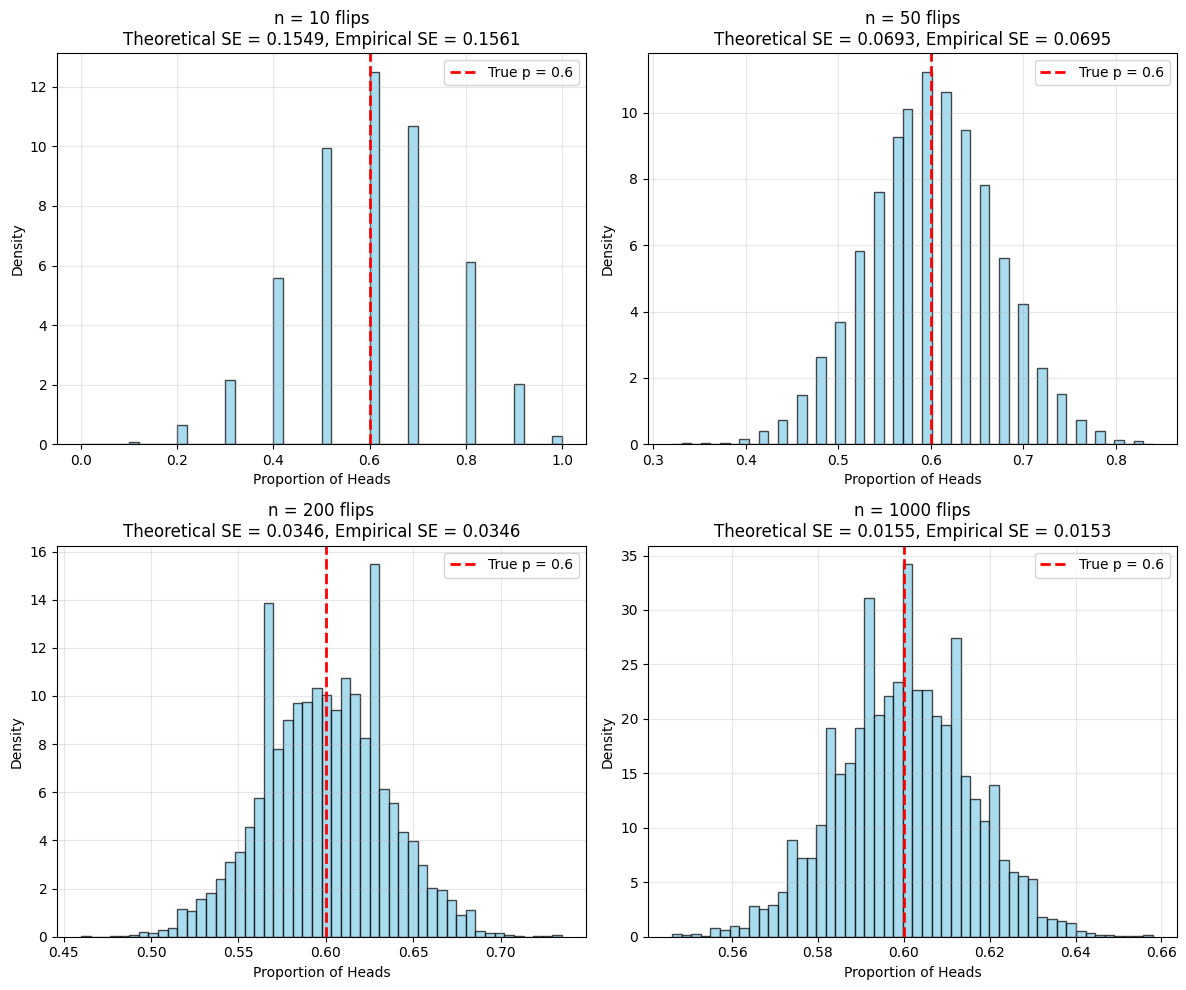

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# "Population": Bernoulli(p=0.6) distribution
p = 0.6
pop_mean = p
pop_var = p * (1 - p)

# Flip coin n times and compute proportion of heads
def flip_experiment(p, n, n_experiments=10000):
    proportions = []
    for _ in range(n_experiments):
        flips = np.random.binomial(1, p, n)
        proportions.append(np.mean(flips))
    return np.array(proportions)

# Different numbers of flips
flip_counts = [10, 50, 200, 1000]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, n in enumerate(flip_counts):
    props = flip_experiment(p, n)
    
    theoretical_se = np.sqrt(pop_var / n)
    empirical_se = np.std(props, ddof=1)
    
    axes[idx].hist(props, bins=50, density=True, alpha=0.7, 
                   edgecolor='black', color='skyblue')
    axes[idx].axvline(pop_mean, color='red', linestyle='--', 
                     linewidth=2, label=f'True p = {p}')
    axes[idx].set_xlabel('Proportion of Heads')
    axes[idx].set_ylabel('Density')
    axes[idx].set_title(f'n = {n} flips\nTheoretical SE = {theoretical_se:.4f}, Empirical SE = {empirical_se:.4f}')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('coin_flip_sampling.png', dpi=150, bbox_inches='tight')
plt.show()